# Importing libraries 🤷‍♂️

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Read Data 

In [152]:
df=pd.read_csv("D:\\Data_Clean\\Cars_m\\Car details v3.csv")

In [153]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Exploration data

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [186]:
df.describe()

,year,km_driven,fuel,transmission,mileage,engine,max_power,seats,Modified_price
count,7906.000000,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.918866e+04,1.471667,1.131672,947.702378,1458.708829,2766.125348,5.416393,12.999190
std,3.863695,5.679230e+04,0.537541,0.338155,925.336832,503.893057,5162.123778,0.959208,0.827620
min,1994.000000,1.000000e+00,1.000000,1.000000,0.000000,624.000000,35.000000,2.000000,10.308919
25%,2012.000000,3.500000e+04,1.000000,1.000000,185.000000,1197.000000,100.000000,5.000000,12.506177
50%,2015.000000,6.000000e+04,1.000000,1.000000,240.000000,1248.000000,739.000000,5.000000,13.017003
75%,2017.000000,9.542500e+04,2.000000,1.000000,1944.000000,1582.000000,3748.000000,5.000000,13.444447
max,2020.000000,2.360457e+06,4.000000,2.000000,3344.000000,3604.000000,108495.000000,14.000000,16.118096


In [155]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [156]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [157]:
df["transmission"].value_counts()

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

In [158]:
df["fuel"].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

<Axes: >

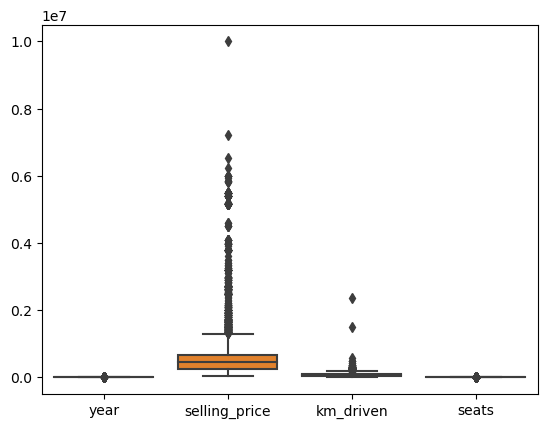

In [159]:
#the description shows that we have outliers in colums like selling_price and some outliers in km_driven
#let me show you that
sns.boxplot(data=df)

# Data Cleaning and Preprocessing

In [160]:
df.dropna(axis=0,inplace=True)

In [161]:
#creating a function that filter column 
# we use eval() -> to retuen the arithmatic string in ()
def Convert_INT(s:str):
    d=""
    for i in s:
        if i.isdigit():
            d+=i
    return eval(d)

# we have three columns that we have to filter them to be integer {mileage , engine max_power}


In [162]:
#now we select the columns to  apply
df["mileage"]=df["mileage"].apply(Convert_INT)
df["engine"]=df["engine"].apply(Convert_INT)
df["max_power"]=df["max_power"].apply(Convert_INT)




In [163]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,234,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114,1498,10352,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,177,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,230,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,161,1298,882,"11.5@ 4,500(kgm@ rpm)",5.0


In [164]:
# now we will drop the unuseful columns
df.drop(["name","seller_type","torque","owner"],inplace=True,axis=1)

In [167]:
# now let us convert the cloumn to intger 
#Fuel column 
df.loc[df["fuel"]=="Diesel","fuel"]=1
df.loc[df["fuel"]=="Petrol","fuel"]=2
df.loc[df["fuel"]=="CNG","fuel"]=3
df.loc[df["fuel"]=="LPG","fuel"]=4


#**********************************************************************************************


#Transmission column
df.loc[df["transmission"]=="Manual","transmission"]=1
df.loc[df["transmission"]=="Automatic","transmission"]=2


In [168]:
df.head()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,seats
0,2014,450000,145500,1,1,234,1248,74,5.0
1,2014,370000,120000,1,1,2114,1498,10352,5.0
2,2006,158000,140000,2,1,177,1497,78,5.0
3,2010,225000,127000,1,1,230,1396,90,5.0
4,2007,130000,120000,2,1,161,1298,882,5.0


In [169]:
df["transmission"].value_counts()

transmission
1    6865
2    1041
Name: count, dtype: int64

In [170]:
df["fuel"].value_counts()

fuel
1    4299
2    3520
3      52
4      35
Name: count, dtype: int64

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   transmission   7906 non-null   object 
 5   mileage        7906 non-null   int64  
 6   engine         7906 non-null   int64  
 7   max_power      7906 non-null   int64  
 8   seats          7906 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 617.7+ KB


In [173]:
 # Change data types
df["fuel"]=df["fuel"].astype("int")
df["transmission"]=df["transmission"].astype("int")

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   int32  
 4   transmission   7906 non-null   int32  
 5   mileage        7906 non-null   int64  
 6   engine         7906 non-null   int64  
 7   max_power      7906 non-null   int64  
 8   seats          7906 non-null   float64
dtypes: float64(1), int32(2), int64(6)
memory usage: 555.9 KB


# Data Visualization 

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


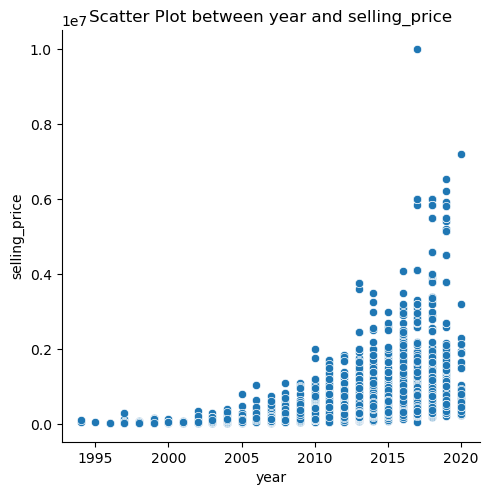

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


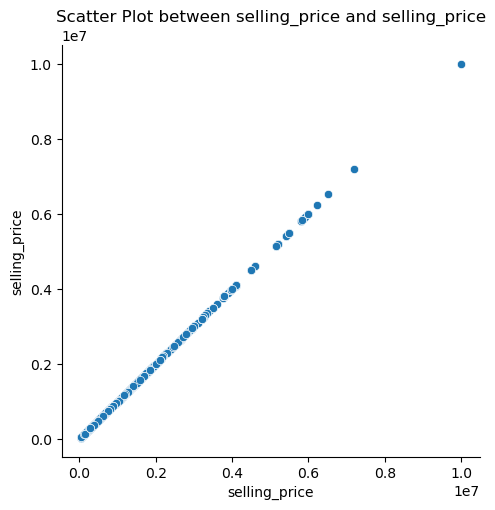

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


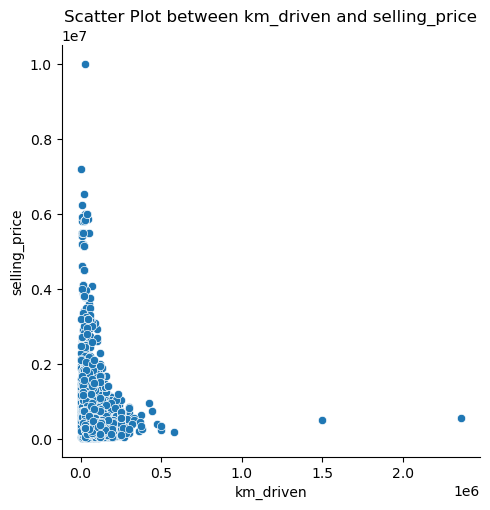

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


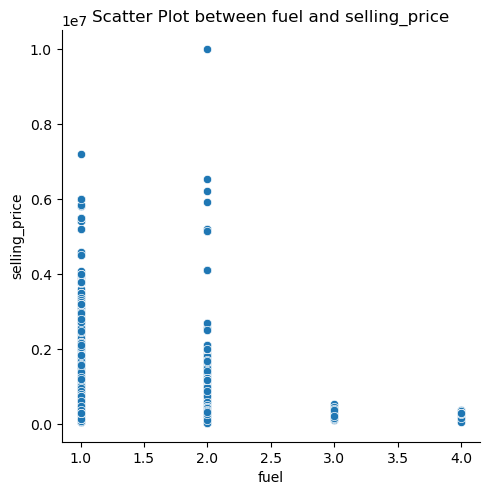

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


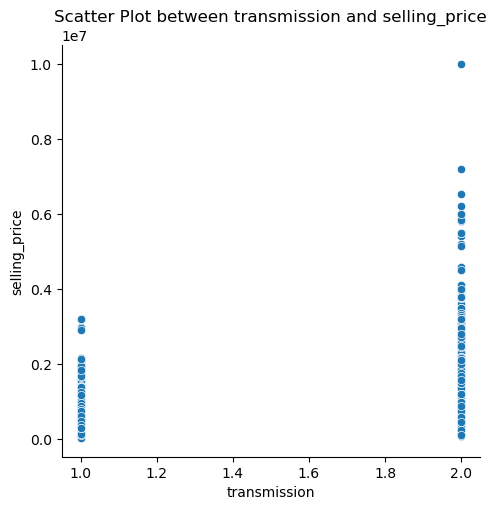

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


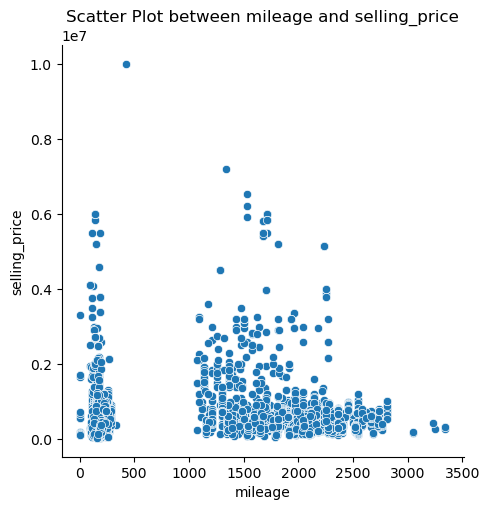

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


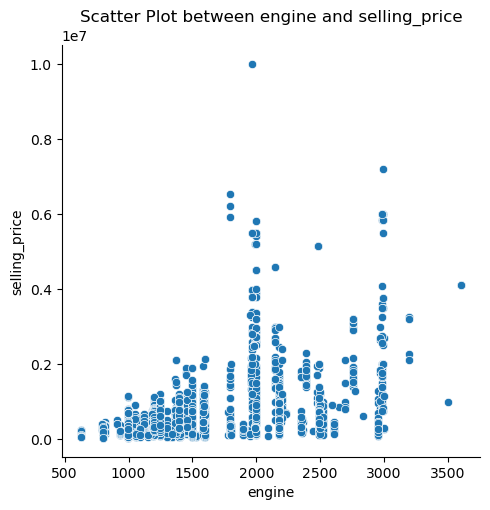

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


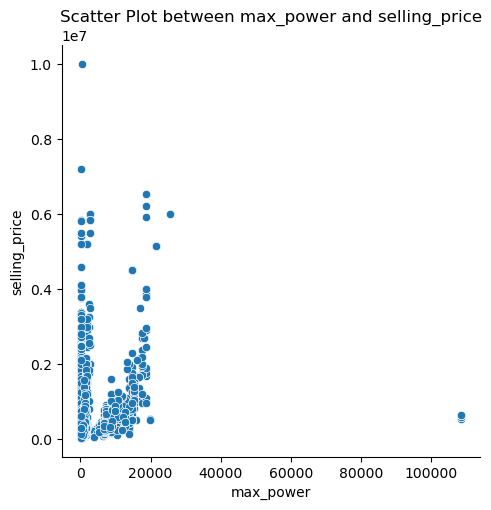

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


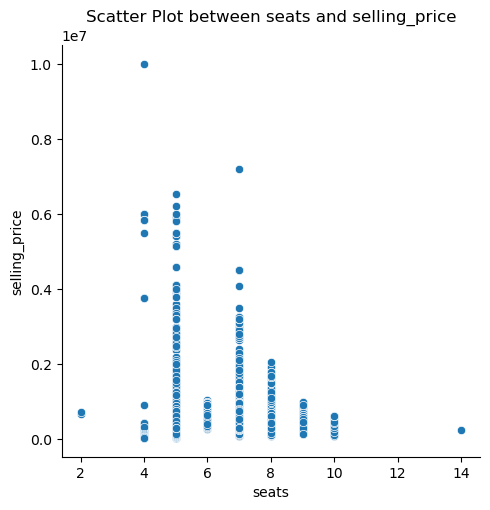

In [175]:
for column in df.columns:
    sns.relplot(data=df,x=column,y="selling_price",kind="scatter")
    plt.title(f"Scatter Plot between {column} and selling_price")
    plt.show()



In [176]:
correlations = df.corrwith(df['selling_price'])
correlations

year             0.412302
selling_price    1.000000
km_driven       -0.222158
fuel            -0.203686
transmission     0.590269
mileage          0.098988
engine           0.455682
max_power        0.137042
seats            0.041617
dtype: float64

# Split Trianing and test data

In [177]:
X=df.drop(["selling_price"],axis=1)
Y=df["selling_price"]


In [178]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

# Model Traning

In [179]:

lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)


LinearRegression()

In [180]:
Training_prediction=lin_reg.predict(X_train)
acc_log = round(lin_reg.score(X_train, Y_train) * 100,2)
acc_log

55.81

# The Prediction Percentage is Too Week Let's Fix it

In [181]:
#the prediction is week beacuse the outliers of selling_price column let do the predictoin again wiht apply log(selling_price)
df["Modified_price"]=df["selling_price"].apply(np.log)
df.drop(["selling_price"],inplace=True,axis=1)
X=df.drop(["Modified_price"],axis=1)
Y=df["Modified_price"]


In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [183]:

lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)


LinearRegression()

In [184]:
Training_prediction=lin_reg.predict(X_train)
acc_log = round(lin_reg.score(X_train, Y_train) * 100,2)
acc_log

80.4

# I think predicting is more accurate than before 👌.



